In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import image
from matplotlib import pyplot
import glob as gl

In [2]:
pokemon_class = pd.read_csv('pokemon.csv')

pokemon_class.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [3]:
pokemon_class.sort_values(by=['Name'], inplace=True)
pokemon_class.head()   

,Name,Type1,Type2
459,abomasnow,Grass,Ice
62,abra,Psychic,NaN
358,absol,Dark,NaN
616,accelgor,Bug,NaN
680,aegislash-blade,Steel,Ghost


In [4]:
enderecos = gl.glob("./images/*")
enderecos.sort()

,Name,Type1,Type2,Arquivo
459,abomasnow,Grass,Ice,./images/abomasnow.png
62,abra,Psychic,NaN,./images/abra.png
358,absol,Dark,NaN,./images/absol.png
616,accelgor,Bug,NaN,./images/accelgor.png
680,aegislash-blade,Steel,Ghost,./images/aegislash-blade.png
...,...,...,...,...
570,zoroark,Dark,NaN,./images/zoroark.png
569,zorua,Dark,NaN,./images/zorua.png
40,zubat,Poison,Flying,./images/zubat.png
633,zweilous,Dark,Dragon,./images/zweilous.png


In [9]:
lista_imagens = []
for arq in enderecos:
    imagem = image.imread(arq)
    lista_imagens.append(imagem)
pokemon_class.assign(Imagens = lista_imagens)

,Name,Type1,Type2,Imagens
459,abomasnow,Grass,Ice,"[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ..."
62,abra,Psychic,NaN,"[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ..."
358,absol,Dark,NaN,"[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ..."
616,accelgor,Bug,NaN,"[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ..."
680,aegislash-blade,Steel,Ghost,"[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ..."
...,...,...,...,...
570,zoroark,Dark,NaN,"[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ..."
569,zorua,Dark,NaN,"[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ..."
40,zubat,Poison,Flying,"[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ..."
633,zweilous,Dark,Dragon,"[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ..."


In [12]:
pokemon_edit = pokemon_class.assign(Imagens = lista_imagens)
pokemon_edit = pokemon_edit.assign(Arquivo = enderecos)

In [13]:
pokemon_edit.head()

,Name,Type1,Type2,Imagens,Arquivo
459,abomasnow,Grass,Ice,"[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ...",./images/abomasnow.png
62,abra,Psychic,NaN,"[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ...",./images/abra.png
358,absol,Dark,NaN,"[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ...",./images/absol.png
616,accelgor,Bug,NaN,"[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ...",./images/accelgor.png
680,aegislash-blade,Steel,Ghost,"[[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ...",./images/aegislash-blade.png


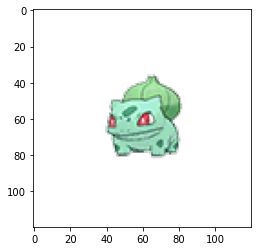

In [20]:
#Para visualizar o pokemon sendo analisado
pyplot.imshow(pokemon_edit['Imagens'][0])
pyplot.show()

In [27]:
pokemon_edit = pokemon_edit.sort_index(ascending=True)


In [28]:
pokemon_explore_class_1 = pokemon_edit.head(20)

In [29]:
print(pokemon_explore_class_1)

          Name   Type1   Type2  \
0    bulbasaur   Grass  Poison   
1      ivysaur   Grass  Poison   
2     venusaur   Grass  Poison   
3   charmander    Fire     NaN   
4   charmeleon    Fire     NaN   
5    charizard    Fire  Flying   
6     squirtle   Water     NaN   
7    wartortle   Water     NaN   
8    blastoise   Water     NaN   
9     caterpie     Bug     NaN   
10     metapod     Bug     NaN   
11  butterfree     Bug  Flying   
12      weedle     Bug  Poison   
13      kakuna     Bug  Poison   
14    beedrill     Bug  Poison   
15      pidgey  Normal  Flying   
16   pidgeotto  Normal  Flying   
17     pidgeot  Normal  Flying   
18     rattata  Normal     NaN   
19    raticate  Normal     NaN   

                                              Imagens                  Arquivo  
0   [[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ...   ./images/bulbasaur.png  
1   [[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], ...     ./images/ivysaur.png  
2   [[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0

In [ ]:
#Criação do modelo computacional
model 